# Getting some style: fantasy maps

Our objective today: make a stylized map of Middle Earth that's similar to those in the front pages of the books.
I saw [this map of Middle Earth](https://www.r-bloggers.com/interactive-and-styled-middle-earth-map/) made with R, and being a Python supremicist, felt that the gauntlet had been thrown down.

First, let's check out what we've got using Geopandas.

In [5]:
import geopandas
import fiona
import matplotlib.pyplot as plt

I'm keeping the repository in a separate folder dedicated to datasets, but you can clone the repository at https://github.com/jvangeld/ME-GIS.

In [7]:
coasts =  geopandas.read_file('../../datamancery/geo/ME-GIS-master/Coastline2.shp')
cities =  geopandas.read_file('../../datamancery/geo/ME-GIS-master/Cities.shp')
forests = geopandas.read_file('../../datamancery/geo/ME-GIS-master/Forests.shp')
towns =   geopandas.read_file('../../datamancery/geo/ME-GIS-master/Towns.shp')
lakes =   geopandas.read_file('../../datamancery/geo/ME-GIS-master/Lakes2.shp')

In [23]:
cities.sample(5)

,GM_LAYER,GM_TYPE,LAYER,Name,geometry
0,City,City,City,None,POINT (240259.0304054883 1071846.337394591)
15,City,City,City,Umbar,POINT (980856.8955598327 116530.2494038891)
22,City,City,City,Morannon,POINT (1180634.357018766 720624.526880509)
11,City,City,City,Edoras,POINT (863747.0487574667 723401.7496420525)
14,City,City,City,Caras Galadhon,POINT (969295.6418884165 921785.9769954863)


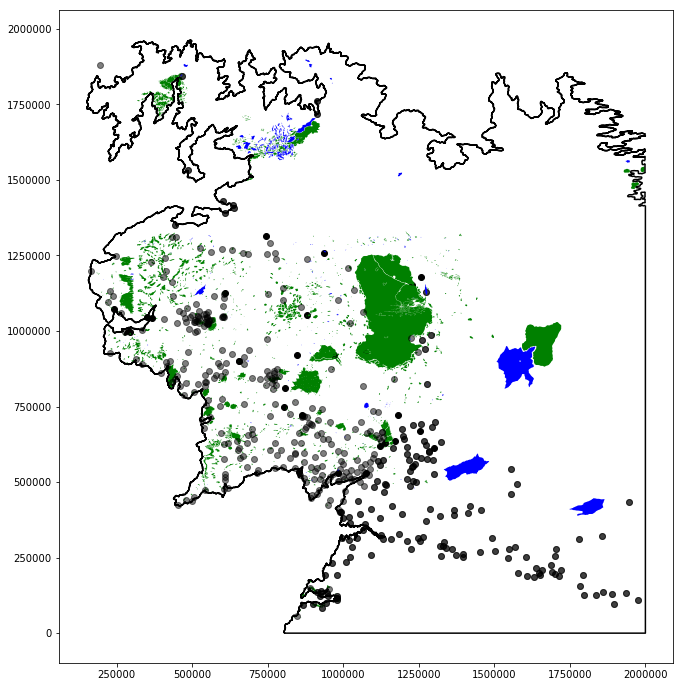

In [54]:
base = coasts.plot(color="black", figsize=(12,12))
cities.plot(ax=base, color="black")
forests.plot(ax=base, color="green")
towns.plot(ax=base, color="black", alpha=0.5)
lakes.plot(ax=base, color="blue")
plt.show()

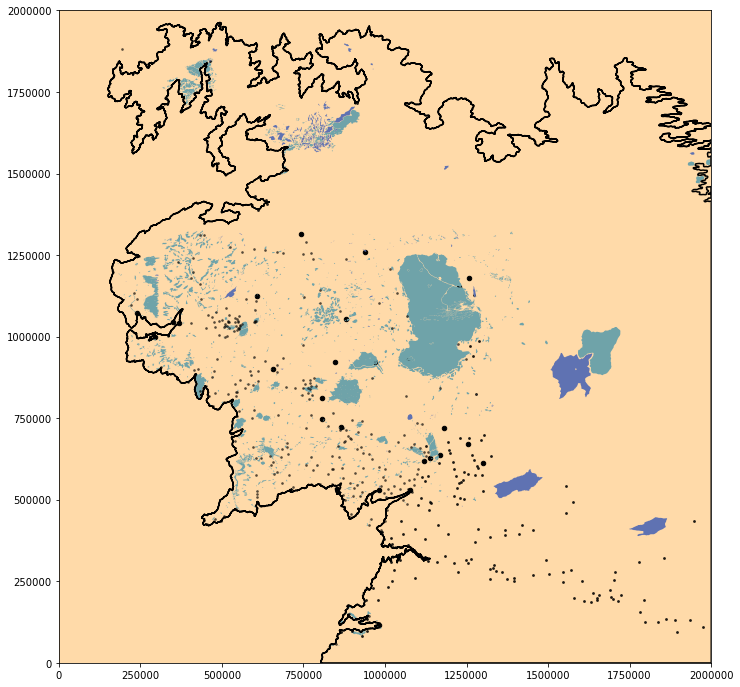

In [56]:
base = coasts.plot(color="black", figsize=(12,12))
base.patch.set_facecolor('#ffdaa9')
cities.plot(ax=base, color="black", markersize=20)
forests.plot(ax=base, color="#6fa3a9")
towns.plot(ax=base, color="black", alpha=0.5, markersize=3)
lakes.plot(ax=base, color="#5f72b2")
plt.xlim([25, 2000000])
plt.ylim([25, 2000000])
plt.show()

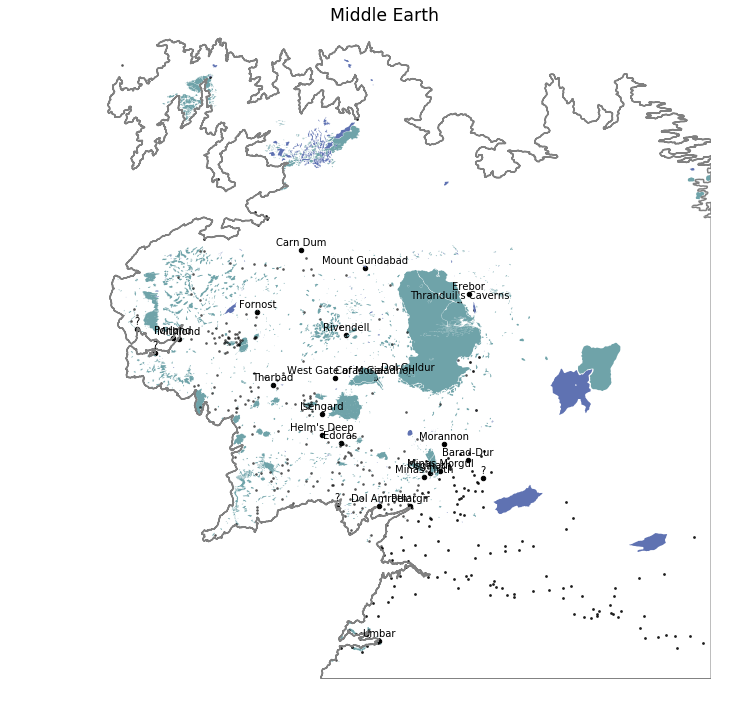

In [117]:
base = coasts.plot(color="grey", figsize=(12,12))
base.patch.set_facecolor('#ffdaa9')
cities.plot(ax=base, color="black", markersize=20)
forests.plot(ax=base, color="#6fa3a9")
towns.plot(ax=base, color="black", alpha=0.5, markersize=3)
lakes.plot(ax=base, color="#5f72b2")
plt.xlim([50, 2000000])
plt.ylim([50, 2000000])
for idx, row in cities.iterrows():
    name = row.Name if row.Name else '?'
    text_coords = [arr.tolist()[0] for arr in row.geometry.xy]
    text_coords[1] += 15000
    plt.annotate(s=name, xy=text_coords, horizontalalignment='center', size="medium")
plt.title("Middle Earth", size="xx-large")
plt.axis('off')
plt.savefig('middle_earth.png')
plt.show()